# 1.Libraries

In [4]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn import preprocessing 
from sklearn.decomposition import PCA

# 2.Load and shaping data

In [5]:
url ="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

df = pd.read_csv(url, names=['lng sepalo','anch sepalo','lng petalo','anch petalo','especie'])

In [6]:
print(df.info())
print(df.head())
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
lng sepalo     150 non-null float64
anch sepalo    150 non-null float64
lng petalo     150 non-null float64
anch petalo    150 non-null float64
especie        150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB
None
   lng sepalo  anch sepalo  lng petalo  anch petalo      especie
0         5.1          3.5         1.4          0.2  Iris-setosa
1         4.9          3.0         1.4          0.2  Iris-setosa
2         4.7          3.2         1.3          0.2  Iris-setosa
3         4.6          3.1         1.5          0.2  Iris-setosa
4         5.0          3.6         1.4          0.2  Iris-setosa


,count,mean,std,min,25%,50%,75%,max
lng sepalo,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
anch sepalo,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
lng petalo,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
anch petalo,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


# 3.Transforming

In [9]:
le = preprocessing.LabelEncoder()

#Data
dfx=df.drop(['especie'],axis=1)
x=dfx.values
xn=StandardScaler().fit_transform(x)
#Feature name
f= list(dfx)
#Number of features
nf=len(f)
#Labels
y=df.especie
#target
y_c=le.fit_transform(y)
#Unique target
target_number=np.unique(y_c)
#Unique labels
target_names=y.unique()
#Number of labels
nl=len(target_names)

data_set={'data':x, 
          'data_normalized':xn,
          'target':y_c,
          'labels':y,
          'unique labels': target_names,
          'len':nl,
          'feature': f,
          'len_f': nf}

In [13]:
#Calculo de la Matriz de Covarianza de las variables

cov_mat = np.cov(xn.T)


#Calculo de los Eigenvalues and Eigenvector

#Eigenvector = direcciones donde la varianza es mayor
#Eigenvalues = valor de la varianza en un eigenvector

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)


ev_ab=abs(eig_vals)
ev_t=sum(ev_ab)
var_exp=[(i / ev_t)*100 for i in ev_ab]

df_fi=pd.DataFrame({
    'feature':f,
    'eigen_value':eig_vals,
    'var_explain':var_exp
})

df_fi=df_fi.sort_values(by='var_explain', ascending=False)

df_fi['var_acu']=df_fi['var_explain'].cumsum()

print(df_fi.head())



Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.93035378 0.92740362 0.14834223 0.02074601]
       feature  eigen_value  var_explain     var_acu
0   lng sepalo     2.930354    72.770452   72.770452
1  anch sepalo     0.927404    23.030523   95.800975
2   lng petalo     0.148342     3.683832   99.484807
3  anch petalo     0.020746     0.515193  100.000000


In [79]:

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)
print(df_fi.head())


Text(0, 0.5, 'cumulative explained variance')

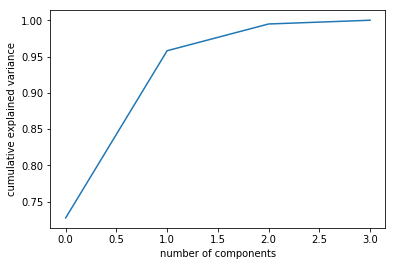

In [11]:
pca=PCA().fit(xn)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

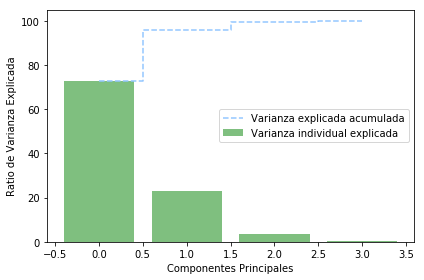

In [14]:
# Representamos en un diagrama de barras la varianza explicada por cada autovalor, y la acumulada
with plt.style.context('seaborn-pastel'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(len(df_fi['var_explain'])),df_fi['var_explain'], alpha=0.5, align='center',
            label='Varianza individual explicada', color='g')
    plt.step(range(len(df_fi['var_acu'])), df_fi['var_acu'], where='mid', linestyle='--', label='Varianza explicada acumulada')
    plt.ylabel('Ratio de Varianza Explicada')
    plt.xlabel('Componentes Principales')
    plt.legend(loc='best')
    plt.tight_layout()
    
    

In [31]:
#To select feature that represent the 90%:
dfvi=df_fi.loc[df_fi['var_acu'] <= 99.9]
v=dfvi['feature'].tolist
f90=np.array(dfvi['feature'])
nf90=len(f90)

In [21]:
data_set.update({'principal_feature':f90,'n_principal_feature':nf90})

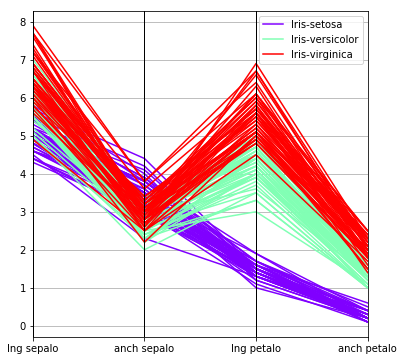

In [39]:
pcp = pd.DataFrame(x, columns=f)
#pcp=pcp[f90]
pcp['target']=pd.DataFrame(y)


#Parallel Coordinate Plot
plt.figure(figsize=(6, 6))
pd.plotting.parallel_coordinates(pcp, 'target' ,  colormap='rainbow')

plt.show()

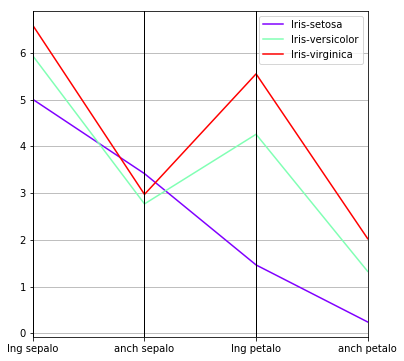

In [44]:

ma=pd.DataFrame(pcp.loc[pcp['target']=='Iris-setosa'].mean(axis=0)).T
ma['target']='Iris-setosa'
mb=pd.DataFrame(pcp.loc[pcp['target']=='Iris-versicolor'].mean(axis=0)).T
mb['target']='Iris-versicolor'
mc=pd.DataFrame(pcp.loc[pcp['target']=='Iris-virginica'].mean(axis=0)).T
mc['target']='Iris-virginica'

mab=pd.concat([ma,mb,mc])


#Parallel Coordinate Plot
plt.figure(figsize=(6,6))
pd.plotting.parallel_coordinates(mab, 'target' ,  colormap='rainbow')

plt.show()

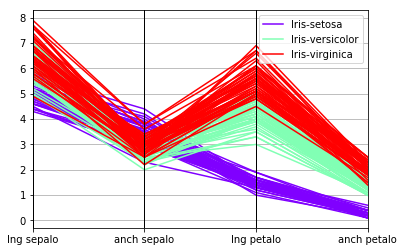

In [15]:

pcp = pd.DataFrame(x, columns=f)
pcp['target']=pd.DataFrame(y)

#Parallel Coordinate Plot

pd.plotting.parallel_coordinates(pcp, 'target' ,  colormap='rainbow')

plt.show()


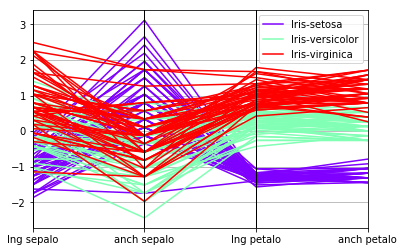

In [16]:
pcp = pd.DataFrame(xn, columns=f)
pcp['target']=pd.DataFrame(y)

#Parallel Coordinate Plot

pd.plotting.parallel_coordinates(pcp, 'target' ,  colormap='rainbow')

plt.show()

# PCA

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_pca = pca.fit(x)

Automatically created module for IPython interactive environment
explained variance ratio (first two components): [0.72770452 0.23030523]


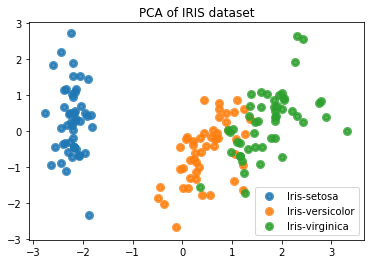

<Figure size 432x288 with 0 Axes>

In [19]:
print(__doc__)

pca = PCA(n_components=2)
X_r = pca.fit(xn).transform(xn)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
lw = 3

for  i, target_name in zip( target_number, target_names):
    plt.scatter(X_r[y_c == i, 0], X_r[y_c == i, 1], cmap=plt.get_cmap('rainbow'), 
                alpha=.8, lw=lw,
                label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

plt.figure()


plt.show()

In [177]:
data_set={'data':x, 
          'data_normalized':xn,
          'target':y_c,
          'labels':y,
          'unique labels': target_names,
          'len':nl,
          'feature': f,
          'len_f': nf}

In [195]:
data_final=pd.DataFrame(data_set['data'], columns=data_set['feature'])
data_final['Resultado']=pd.DataFrame(data_set['labels'])
PC=pd.DataFrame(X_r, columns=['PC1','PC2'])
data_final=data_final.join(PC)

In [203]:
file=#Path/Filename
with pd.ExcelWriter(file) as writer:  
    data_final.to_excel(writer, sheet_name='1')
    df_fi.to_excel(writer, sheet_name='2')